In [1]:
## Aug1 - Occurences by genotype graph & Area under prevalence curve

In [2]:
# Config: 40-yr-simu, 50,000-popu, 0.7-treatment-cvrg, DHAPPQ-ASAQ-AL-cycling

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker

import mpld3
from mpld3 import plugins
from mpld3.utils import get_id
import collections

In [23]:
fig_size = (13,8)

In [7]:
df = pd.read_csv('monthly_data_0.txt', sep='\t')

In [37]:
df

,current_time,sclock_to_time,year,month,day,seasonal_fac,treated_p_5-,treated_p_5+,population,sep,...,TYFYFC2X.1,TYFYFY1x.1,TYFYFY1X.1,TYFYFY2x.1,TYFYFY2X.1,Unnamed: 279,bsp_in_popu,time_in_yrs,selected_bsp,new_bsp
0,0,631152000,1990,1,1,1,0.6,0.5,50000,-1111,...,0,0,0,0,0,NaN,2449.995,0.000000,0.000000,0.000000
1,31,633830400,1990,2,1,1,0.0,0.0,50091,-1111,...,0,0,0,0,0,NaN,5910.100,0.083333,0.000000,0.000000
2,59,636249600,1990,3,1,1,0.0,0.0,50237,-1111,...,0,0,0,0,0,NaN,7324.000,0.158602,0.000000,0.000000
3,90,638928000,1990,4,1,1,0.0,0.0,50343,-1111,...,0,0,0,0,0,NaN,7278.100,0.241935,0.000000,0.000000
4,120,641520000,1990,5,1,1,0.0,0.0,50477,-1111,...,0,0,0,0,0,NaN,8644.550,0.322581,0.000000,0.000000
5,151,644198400,1990,6,1,1,0.0,0.0,50572,-1111,...,0,0,0,0,0,NaN,9327.000,0.405914,0.000000,0.000000
6,181,646790400,1990,7,1,1,0.0,0.0,50686,-1111,...,0,0,0,0,0,NaN,9864.500,0.486559,0.000000,0.000000
7,212,649468800,1990,8,1,1,0.0,0.0,50775,-1111,...,0,0,0,0,0,NaN,10252.800,0.569892,0.000000,0.000000
8,243,652147200,1990,9,1,1,0.0,0.0,50906,-1111,...,0,0,0,0,0,NaN,10626.950,0.653226,0.000000,0.000000
9,273,654739200,1990,10,1,1,0.0,0.0,51023,-1111,...,0,0,0,0,0,NaN,10226.450,0.733871,0.000000,0.000000


In [24]:
fig, ax = plt.subplots(figsize=fig_size)
ax.grid(True, alpha=0.3)

df['bsp_in_popu'] = df['blood_slide_prev'] * 50000 / 100
df['time_in_yrs'] = df['current_time'] / (12*31)
ax.plot(df['time_in_yrs'], df['bsp_in_popu'])
  
# ticker for mpld3
#ticklocs = range(0, 20*locator+1, locator)
#axislim = -5,605
#plt.xticks(ticklocs)
#plt.xlim(*axislim)

ax.set_xlabel('years')
ax.set_ylabel('blood slide prevalence (persons)')

mpld3.display()

Text(0, 0.5, 'blood slide prev from selected genotypes (persons)')

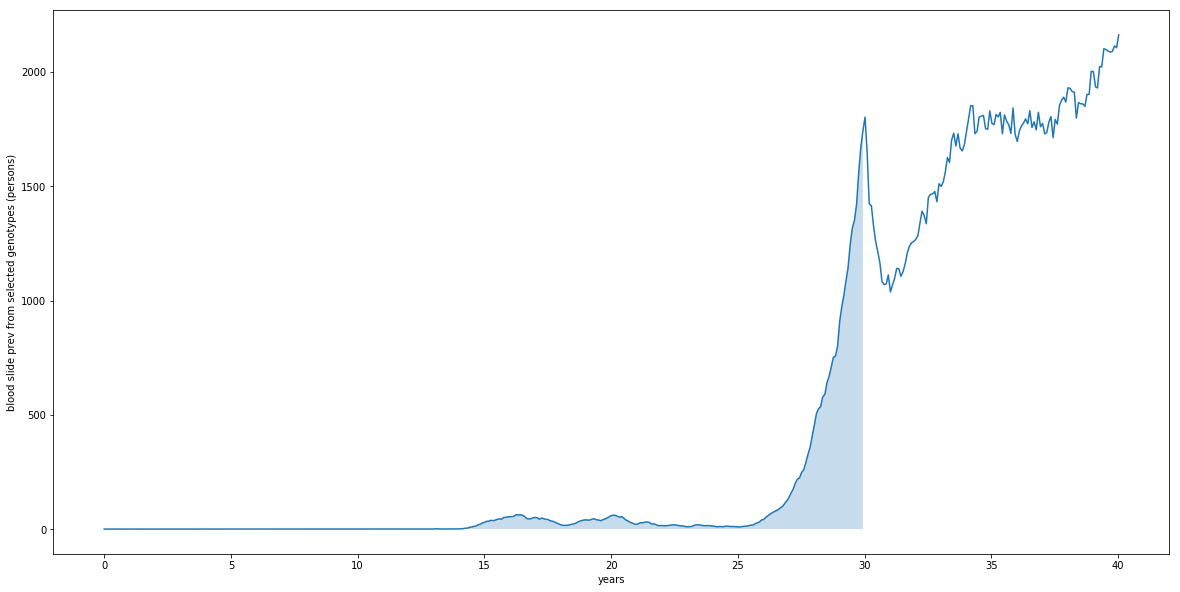

In [34]:
# scale func to show x-axis in years
scale_x = 365
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))

# blood slide prev w.r.t. genotype frequency
fig, ax = plt.subplots()
df['new_bsp'] = df['blood_slide_prev'] * df.iloc[:,0:151].filter(regex='.....Y2.', axis=1).sum(axis=1) * 50000 / 100
ax.plot(df['current_time'], df['new_bsp'])
ax.fill_between(df['current_time'], df['new_bsp'], 
                 where=(df['current_time']<30*365), alpha=0.25)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1825)) # 5-year mark
ax.xaxis.set_major_formatter(ticks_x)
ax.set_xlabel('years')
ax.set_ylabel('blood slide prev from selected genotypes (persons)')
#ax1.set_title('Blood Slide Prev. Plot')


In [38]:
np.trapz(df.iloc[:30*12,-2])

30171.264774831503